<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/Contrast_Histogram_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [11]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images/'
colorImgPath=root_path+"/low_contrast_color_image.PNG"
colorImgPath1=root_path+"/color_dark_image_2.PNG"
bwImagePath=root_path+"/cylinder.PNG"


matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:

imageCyl= cv2.imread(bwImagePath, 0)
if ( imageCyl.any() == None):
    print("file not detected")
else:
    print("file detected")

file detected


Text(0.5, 1.0, 'Original Image')

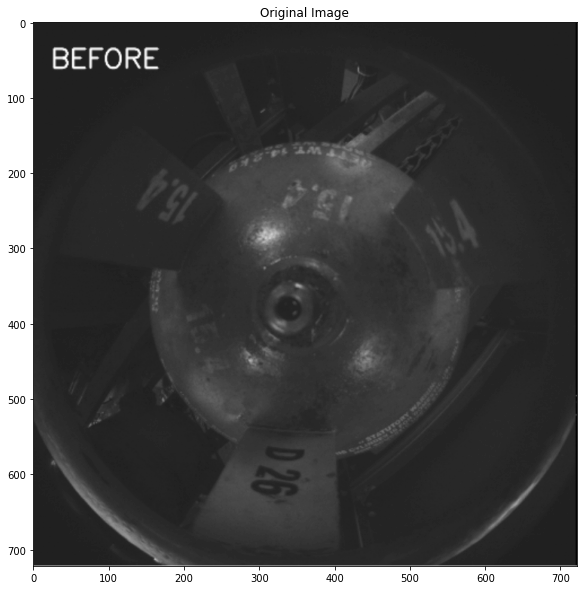

In [36]:
plt.imshow(imageCyl)
plt.title("Original Image")

(-0.5, 721.5, 721.5, -0.5)

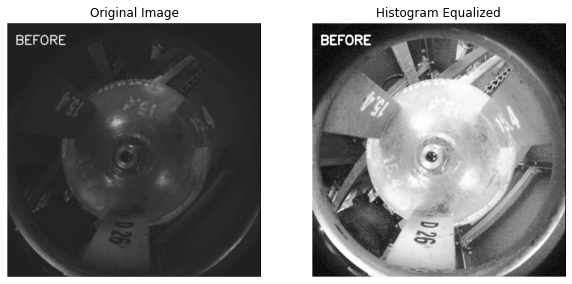

In [37]:
# Equalize histogram
imEq = cv2.equalizeHist(imageCyl)

#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(imageCyl, vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(imEq, vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

As we can see here, the input image on the left is really dark. To rectify this, we need
to adjust the pixel values so that they are spread across the entire spectrum of values,
that is, between 0 and 255.Whenever we capture images in low-light conditions, the images turn out to be
dark. This typically happens when you capture images in the evening or in a dimly
lit room. You must have seen this happen many times! The reason this happens is
because the pixel values tend to concentrate near 0 when we capture the images
under such conditions. When this happens, a lot of details in the image are not
clearly visible to the human eye. The human eye likes contrast, and so we need to
adjust the contrast to make the image look nice and pleasant. A lot of cameras and
photo applications implicitly do this already. We use a process called Histogram
Equalization to achieve this.

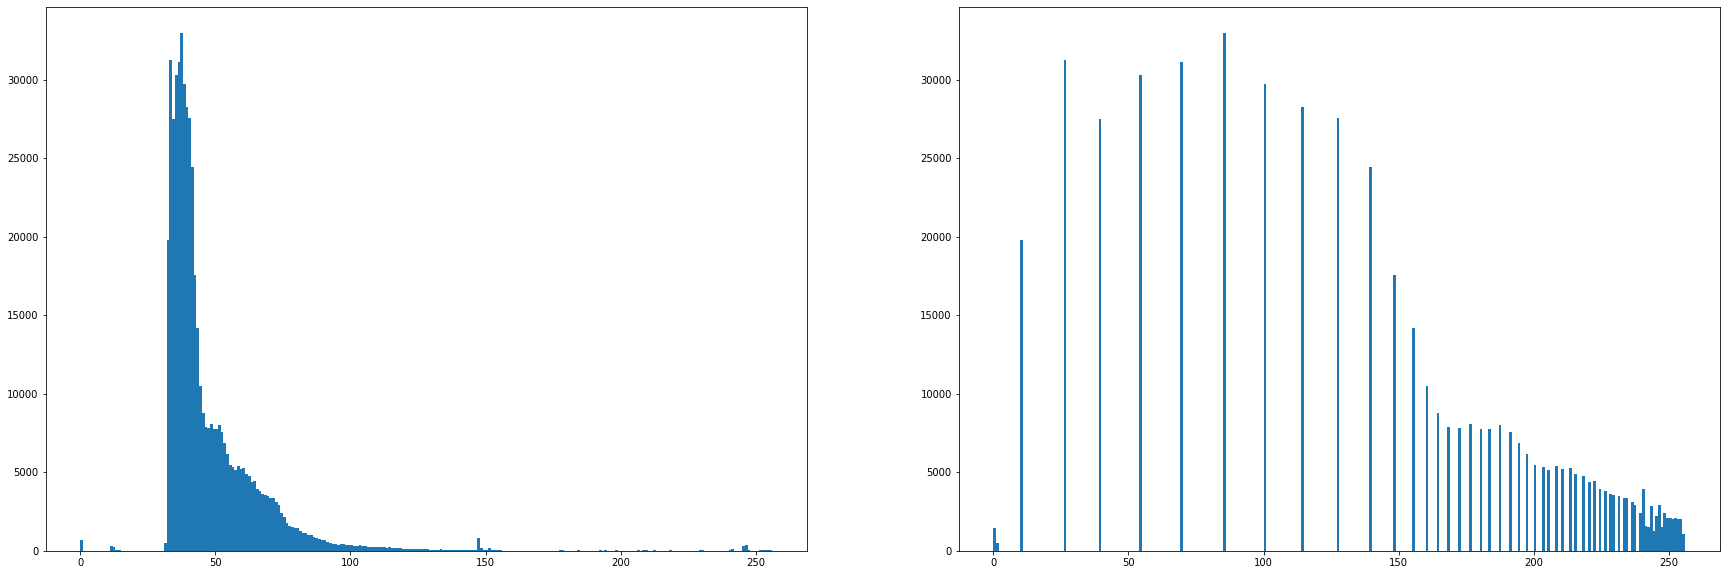

In [18]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.hist(image.ravel(),256,[0,256]); 

plt.subplot(1,2,2)
plt.hist(imEq.ravel(),256,[0,256]); 
plt.show()

Histogram equalization is applicable to grayscale images. OpenCV provides a
function, equalizeHist, to achieve this effect. As we can see here, the code is pretty
straightforward, where we read the image and equalize its histogram to adjust the
contrast of the image.

###Histogram Equalization of Color Images
The right way to perform histogram equalization on color images is to transform the images to a space like the HSV colorspace where colors/hue/tint is separated from the intensity.

These are the steps involved

Tranform the image to HSV colorspace. Perform histogram equalization only on the V channel. Transform the image back to RGB colorspace. Let's go over the code.

The thing about histogram equalization is that it's a nonlinear process. So, we cannot just separate out the three channels in an RGB image, equalize the histogram separately, and combine them later to form the output image. The concept of histogram equalization is only applicable to the intensity values in the image. So, we have to make sure not to modify the color information when we do this. In order to handle the histogram equalization of color images, we need to convert it to a color space where intensity is separated from the color information.



In [24]:
imageC= cv2.imread(colorImgPath, 1)
if ( image.any() == None):
    print("file not detected")
else:
    print("file detected")

file detected


Text(0.5, 1.0, 'Original Image')

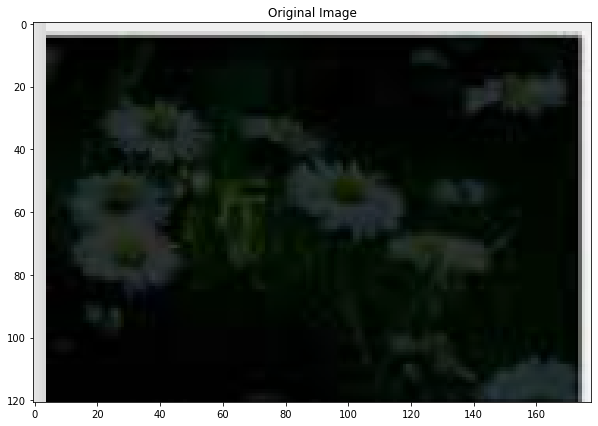

In [25]:
plt.imshow(imageC[:,:,::-1])
plt.title("Original Image")

(-0.5, 177.5, 120.5, -0.5)

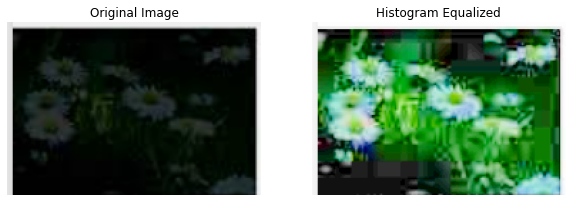

In [26]:
# Convert to HSV 
imhsv = cv2.cvtColor(imageC, cv2.COLOR_BGR2HSV)

# Perform histogram equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)

#Display images
plt.figure()

ax = plt.subplot(1,2,1)
plt.imshow(imageC[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,2,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

Histogram equalization uses the pixels of the entire image to improve contrast. While this may look good in many cases, sometimes we may want to enhance the contrast locally so the image does not looks more natural and less dramatic.

For such applications, we use Contrast Limited Adaptive Histogram Equalization (CLAHE) ) which improves the local contrast. More importantly it allows us to specify the size of the neighborhood that is considered "local".

Let's pick a different image, where we may prefer CLAHE in place of regular histogram equalization.

In [27]:
imageC= cv2.imread(colorImgPath1, 1)
if ( image.any() == None):
    print("file not detected")
else:
    print("file detected")

file detected


Text(0.5, 1.0, 'Original Image')

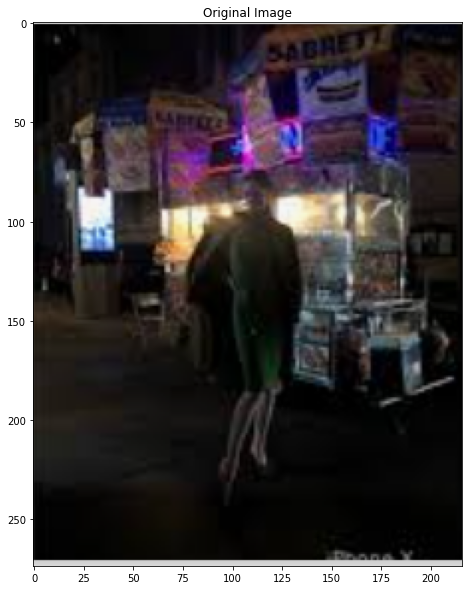

In [28]:
plt.imshow(imageC[:,:,::-1])
plt.title("Original Image")

(-0.5, 215.5, 273.5, -0.5)

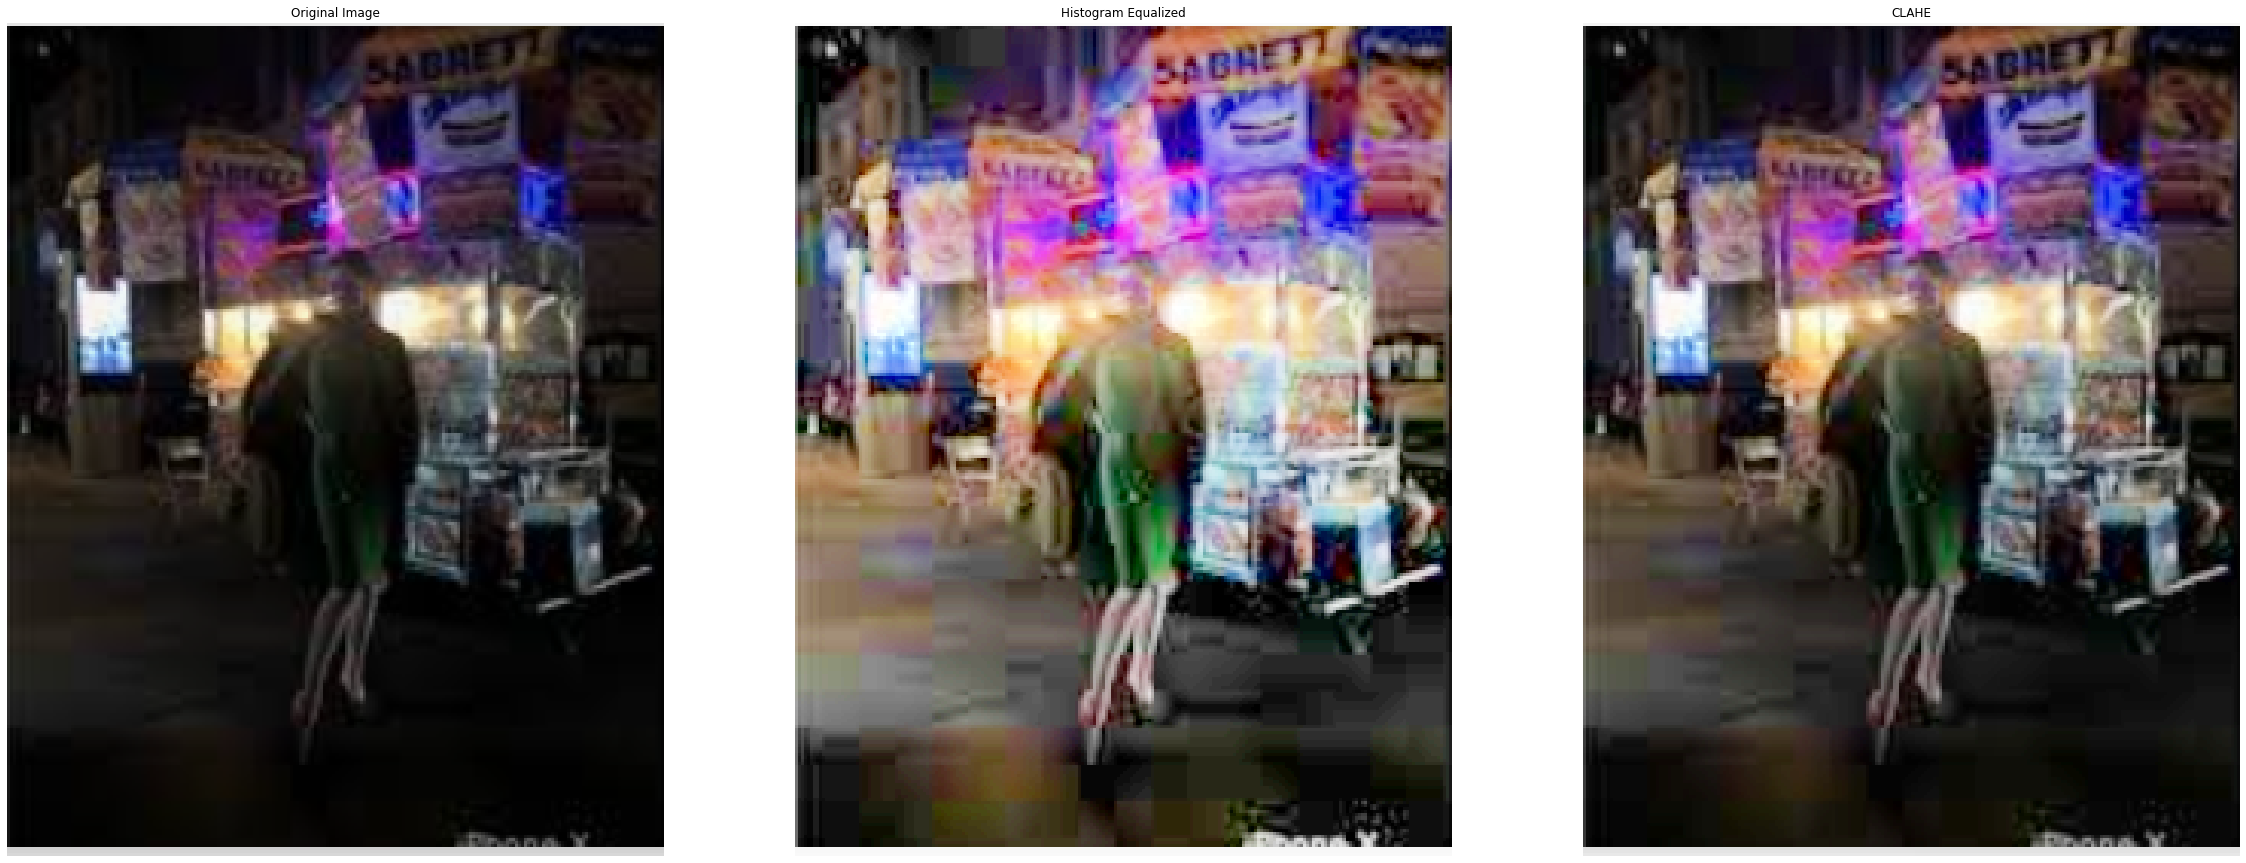

In [34]:
# Convert to HSV 
imhsv = cv2.cvtColor(imageC, cv2.COLOR_BGR2HSV)
imhsvCLAHE = imhsv.copy()

# Perform histogram equalization only on the V channel
imhsv[:,:,2] = cv2.equalizeHist(imhsv[:,:,2])

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))   # TileGrid Size defines the size over which adaptive histogram equalization is performed.clipLimited value of 2 makes it contrast limited
imhsvCLAHE[:,:,2] = clahe.apply(imhsvCLAHE[:,:,2])

# Convert back to BGR format
imEq = cv2.cvtColor(imhsv, cv2.COLOR_HSV2BGR)
imEqCLAHE = cv2.cvtColor(imhsvCLAHE, cv2.COLOR_HSV2BGR)


#Display images
plt.figure(figsize=(40,40))

ax = plt.subplot(1,3,1)
plt.imshow(imageC[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(imEq[:,:,::-1], vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(1,3,3)
plt.imshow(imEqCLAHE[:,:,::-1], vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')

(-0.5, 721.5, 721.5, -0.5)

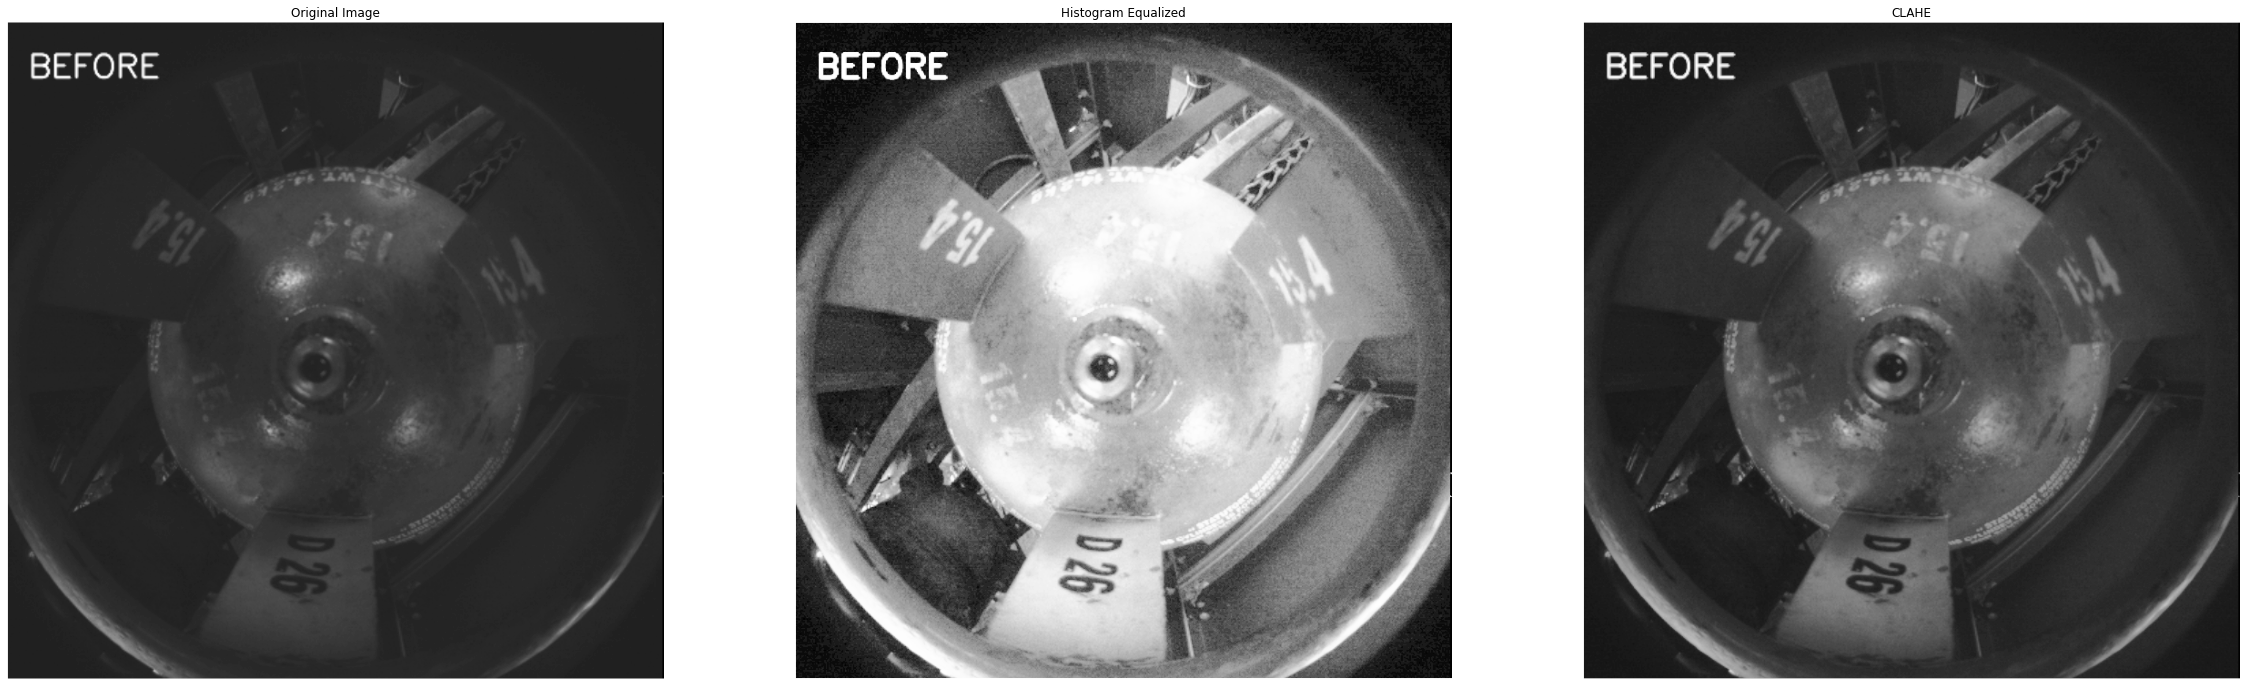

In [38]:
imEqC = cv2.equalizeHist(imageCyl)


clahe1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))   # TileGrid Size defines the size over which adaptive histogram equalization is performed.clipLimited value of 2 makes it contrast limited
imEqCClahe = clahe1.apply(imageCyl)




#Display images
plt.figure(figsize=(40,40))

ax = plt.subplot(1,3,1)
plt.imshow(imageCyl, vmin=0, vmax=255)
ax.set_title("Original Image")
ax.axis('off')


ax = plt.subplot(1,3,2)
plt.imshow(imEqC, vmin=0, vmax=255)
ax.set_title("Histogram Equalized")
ax.axis('off')

ax = plt.subplot(1,3,3)
plt.imshow(imEqCClahe, vmin=0, vmax=255)
ax.set_title("CLAHE")
ax.axis('off')

Look with Contrast Limited Adaptive Histogram Equalization, you have got the best image for Gray Scale image compared to Plain Histogram Equalization